<a href="https://colab.research.google.com/github/LizcanoJuan1010/Machine-Learning-Projects/blob/main/Taller_Aprendizaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descripción del Proyecto (CRISP-DM)
## Juan José Lizcano Barbosa

1. Comprensión del Negocio:
* El mercado de telecomunicaciones es altamente competitivo y saturado, con altos costos de entrada y una base de clientes limitada. Retener clientes es 5 veces más económico que adquirir nuevos, y la tasa de deserción (churn) promedio es del 2% mensual.

* El objetivo del proyecto es: Predecir churn usando una base de datos de entrenamiento (6 meses) para optimizar el área bajo la curva (AUC) en un concurso Kaggle. Diseñar una estrategia de retención costo-efectiva, incluyendo puntos de corte, costos de intervención y análisis de ganancias a partir del CLTV (Customer Lifetime Value).

#Extraccion de datos

In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c retencion-en-telefonia-movil-2501

In [ ]:

!unzip /content/retencion-en-telefonia-movil-2501.zip


In [ ]:
# Para manipulación de datos
import pandas as pd
import numpy as np

# Para división de datos y métricas de evaluación
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler

# Modelos de Clasificación
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, precision_recall_curve

#Redes Neuronales
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras import backend as K



In [ ]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

In [ ]:
!pip install scikeras[tensorflow]

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df=pd.read_excel('/content/traintelco.xlsx')

#EDA y comprension de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8243 entries, 0 to 8242
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     8243 non-null   int64         
 1   Fecha de nacimiento    8243 non-null   datetime64[ns]
 2   tipo cliente           8243 non-null   int64         
 3   Factura online         8243 non-null   int64         
 4   Antigüedad Equipo      8243 non-null   int64         
 5   Plan de datos          8243 non-null   int64         
 6   facturación            8243 non-null   int64         
 7   mora                   8243 non-null   int64         
 8   Fecha inicio contrato  8243 non-null   datetime64[ns]
 9   minutos                8243 non-null   int64         
 10  resultado              8243 non-null   int64         
dtypes: datetime64[ns](2), int64(9)
memory usage: 708.5 KB


In [ ]:
df.head()

In [ ]:

df_tipo_cliente_1 = df[df['tipo cliente'] == 1]

df_tipo_cliente_2 = df[df['tipo cliente'] == 2]


df_tipo_cliente_3 = df[df['tipo cliente'] == 3]

df_Factura_Online_1 = df[df['Factura online'] == 1]

df_Factura_Online_0 = df[df['Factura online'] == 0]

df_Plan_de_datos_1 = df[df['Plan de datos'] == 1]

df_Plan_de_datos_0 = df[df['Plan de datos'] == 0]

df_resultado_1 = df[df['resultado'] == 1]

df_resultado_0 = df[df['resultado'] == 0]


In [ ]:
df_tipo_cliente_1.describe()

In [ ]:
df_tipo_cliente_2.describe()

In [ ]:
df_tipo_cliente_3.describe()

Analisis sobre caracteristicas de los tipos de clientes:
- Hay  menos clientes empresariales
- El 32% de clientes empresariales tuvieron desercion, contra un 16% en mujeres y un 12% en hombres

In [ ]:
df_Factura_Online_1.describe()

In [ ]:
df_Factura_Online_0.describe()

In [ ]:
df.describe()

Analisis sobre factura online:
* Los usuarios que no tuvieron unicamente factura online tienen equipos 3.61 veces más antiguos que quienes usan unicamente factura online, esto nos muestra una interaccion entre estas variables


In [ ]:
df_resultado_1.describe()

In [ ]:
df_resultado_0.describe()

Analisis resultados:
* Como era de esperar quienes tuvieron desercion tuvieron en promedio 1.227 veces más facturacion que quienes no descertaron, con 316868.75 vs 258054.95
* Se puede decir que en promedio tambien usaron mas minutos que quienes no desertaron,  con 1398.878031 y 1141.292938 respectivamente



#Split

Separacion de datos en train y test:

In [ ]:
random_state = 42
X = df.drop('resultado', axis=1)
y = df['resultado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


#Balanceo

In [ ]:
X_train.shape, y_train.shape

((6594, 10), (6594,))

In [ ]:
y_train.value_counts()

In [ ]:
from sklearn.utils import resample

# Suponiendo que X e y ya están divididos en entrenamiento y prueba
X_train_minority = X_train[y_train == 1]
y_train_minority = y_train[y_train == 1]

# Duplicar 4 veces (1,000 → 4,000)
X_resampled, y_resampled = resample(
    X_train_minority,
    y_train_minority,
    replace=True,  # Permitir duplicados
    n_samples=5000,
    random_state=42
)

# Combinar con la clase mayoritaria original (5,000 datos)
X_combined = pd.concat([X_train[y_train == 0], X_resampled])
y_combined = pd.concat([y_train[y_train == 0], y_resampled])

In [ ]:
y_combined.value_counts()

,count
resultado,
0,5509
1,5000


Se decidio usar una tecnica de duplicar datos para evitar usar smote e implementar datos sinteticos, esto implica que se crearon 4000 copias de los 1000 datos existentes en el entrenamiento

#Feature Engineering

In [ ]:
X_combined.head()

In [ ]:
X_combined['edad'] = (datetime.now().year - pd.to_datetime(X_combined['Fecha de nacimiento']).dt.year)

In [ ]:
X_encoded = pd.get_dummies(X_combined, columns=['tipo cliente','Factura online','Plan de datos'])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded.select_dtypes(include=['number']))

<Axes: >

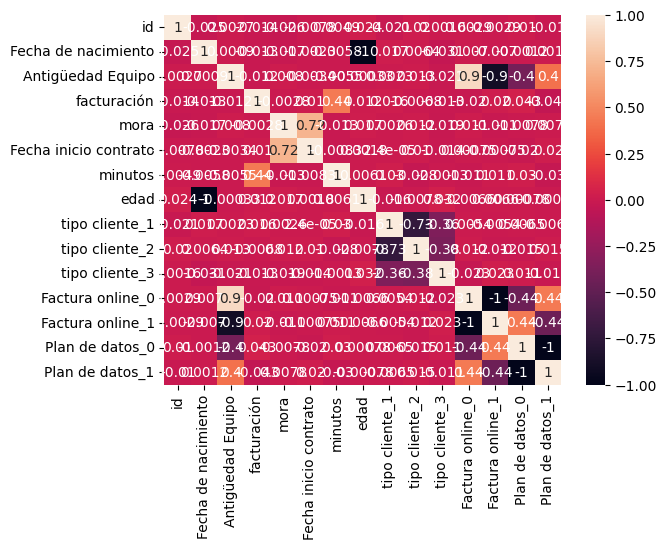

In [ ]:
corr_matrix = X_encoded.corr()
sns.heatmap(corr_matrix, annot=True)

In [ ]:
print(X_scaled)

In [ ]:
X_test['edad'] = (datetime.now().year - pd.to_datetime(X_test['Fecha de nacimiento']).dt.year)
X_encoded_test = pd.get_dummies(X_test, columns=['tipo cliente','Factura online','Plan de datos'])
scaler = StandardScaler()
X_scaled_test = scaler.fit_transform(X_encoded_test.select_dtypes(include=['number']))


In [ ]:
X_train['edad'] = (datetime.now().year - pd.to_datetime(X_train['Fecha de nacimiento']).dt.year)

In [ ]:
X_encoded['meses_contrato'] = (datetime.now().year - pd.to_datetime(X_encoded['Fecha inicio contrato']).dt.year) * 12 + (datetime.now().month - pd.to_datetime(X_encoded['Fecha inicio contrato']).dt.month)


In [ ]:
X_encoded_test['meses_contrato'] = (datetime.now().year - pd.to_datetime(X_encoded_test['Fecha inicio contrato']).dt.year) * 12 + (datetime.now().month - pd.to_datetime(X_encoded_test['Fecha inicio contrato']).dt.month)
X_encoded_test['Antigüedad_Equipo_Factura_online_0'] =X_encoded_test['Antigüedad Equipo'] * X_encoded_test['Factura online_0']
X_encoded_test['Antigüedad_Equipo_Factura_online_1'] = X_encoded_test['Antigüedad Equipo'] * X_encoded_test['Factura online_1']
X_encoded_test['Fecha_inicio_contrato_mora'] = pd.to_numeric(pd.to_datetime(X_encoded_test['Fecha inicio contrato'])) * X_encoded_test['mora']


In [ ]:
X_encoded['Antigüedad_Equipo_Factura_online_0'] = X_encoded['Antigüedad Equipo'] * X_encoded['Factura online_0']
X_encoded['Antigüedad_Equipo_Factura_online_1'] = X_encoded['Antigüedad Equipo'] * X_encoded['Factura online_1']
X_encoded['Fecha_inicio_contrato_mora'] = pd.to_numeric(pd.to_datetime(X_encoded['Fecha inicio contrato'])) * X_encoded['mora']

# Now X_scaled contains your new interaction features
X_encoded.head()


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded.select_dtypes(include=['number']))

In [ ]:
X_scaled_test = scaler.fit_transform(X_encoded_test.select_dtypes(include=['number']))

#Modelado:

##Regresion Logistica

In [ ]:

# Inicializar el modelo de regresión logística
logreg = LogisticRegression(random_state=random_state)

# Entrenar el modelo
logreg.fit(X_scaled, y_combined)

LogisticRegression(random_state=42)

In [ ]:

# Realizar predicciones en el conjunto de prueba
y_pred_logreg = logreg.predict(X_scaled_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_scaled_test)[:, 1])
print("AUC-ROC:", roc_auc_logreg)


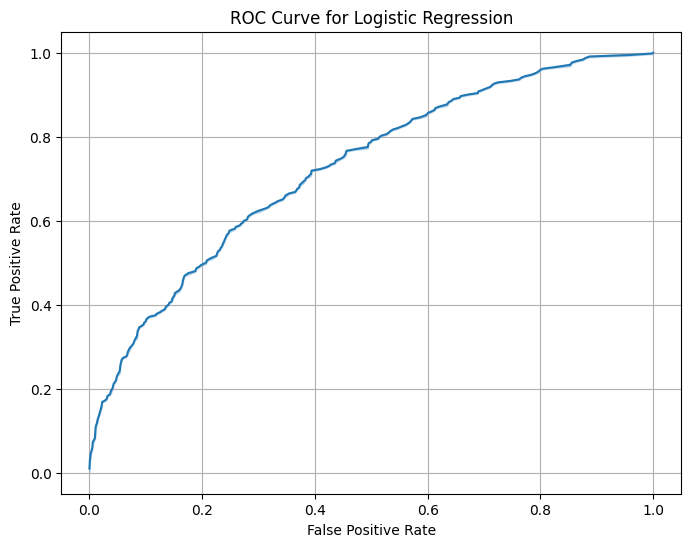

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_scaled_test)[:, 1])

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr)
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


In [ ]:
for df in [X_train, X_test]:
    df['edad'] = (datetime.now().year - pd.to_datetime(df['Fecha de nacimiento']).dt.year)
    df['año_inicio_contrato'] = pd.to_datetime(df['Fecha inicio contrato']).dt.year
    df.drop(['Fecha de nacimiento', 'Fecha inicio contrato'], axis=1, inplace=True)


logreg = LogisticRegression(class_weight='balanced', random_state=random_state)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print("AUC-ROC:", roc_auc_logreg)

              precision    recall  f1-score   support

           0       0.90      0.64      0.75      1373
           1       0.27      0.65      0.38       276

    accuracy                           0.64      1649
   macro avg       0.58      0.65      0.57      1649
weighted avg       0.80      0.64      0.69      1649

[[884 489]
 [ 97 179]]
AUC-ROC: 0.721916991249459


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr)
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [ ]:
X_encoded.columns.to_list()

In [ ]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out=0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            # Resetting index to ensure alignment
            model = sm.OLS(y.reset_index(drop=True), sm.add_constant(pd.DataFrame(X[included + [new_column]].reset_index(drop=True)))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        # Resetting index to ensure alignment
        model = sm.OLS(y.reset_index(drop=True), sm.add_constant(pd.DataFrame(X[included].reset_index(drop=True)))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.select_dtypes(include=['number']).columns)

X_scaled_stepwise = X_scaled_df

result = stepwise_selection(X_scaled_stepwise, y_combined)

print('resulting features:')
print(result)

Add  facturación                    with p-value 2.65154e-235
Add  edad                           with p-value 2.20702e-171
Add  Fecha_inicio_contrato_mora     with p-value 1.23703e-26
Add  meses_contrato                 with p-value 2.43729e-14
Add  mora                           with p-value 1.10238e-53
resulting features:
['facturación', 'edad', 'Fecha_inicio_contrato_mora', 'meses_contrato', 'mora']


In [ ]:
logreg = LogisticRegression(random_state=random_state)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.select_dtypes(include=['number']).columns)

selected_features_df = X_scaled_df.loc[:, ['facturación', 'edad', 'Fecha_inicio_contrato_mora', 'meses_contrato', 'mora']]

logreg.fit(selected_features_df, y_combined)

In [ ]:
X_scaled_df_test = pd.DataFrame(X_scaled_test, columns=X_encoded_test.select_dtypes(include=['number']).columns)
selected_features_df_test = X_scaled_df_test.loc[:, ['facturación', 'edad', 'Fecha_inicio_contrato_mora', 'meses_contrato', 'mora']]


In [ ]:

y_pred_logreg = logreg.predict(selected_features_df_test)

print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(selected_features_df_test)[:, 1])
print("AUC-ROC:", roc_auc_logreg)

              precision    recall  f1-score   support

           0       0.92      0.60      0.73      1373
           1       0.27      0.74      0.40       276

    accuracy                           0.62      1649
   macro avg       0.60      0.67      0.56      1649
weighted avg       0.81      0.62      0.67      1649

[[825 548]
 [ 72 204]]
AUC-ROC: 0.7377898814613086


In [ ]:
print(logreg.coef_)

In [ ]:
coefficients = logreg.coef_
intercept = logreg.intercept_

summary_df = pd.concat([summary_df, pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept[0]]})], ignore_index=True)
summary_df = pd.concat([summary_df, pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept[0]]})], ignore_index=True)

summary_df

,Feature,Coefficient
0,facturación,0.789984
1,edad,0.646775
2,Fecha_inicio_contrato_mora,0.245239
3,meses_contrato,0.513512
4,mora,0.486759
5,Intercept,-0.117347
6,Intercept,-0.117347
7,Intercept,-0.117347


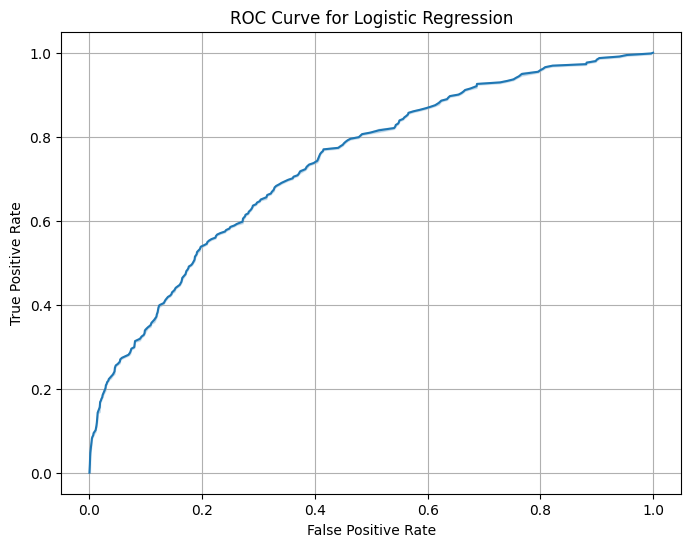

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(selected_features_df_test)[:, 1])

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr)
plt.title('ROC Curve for Logistic Regression with selected features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

## KNN

In [ ]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, 31)}

# Create a StratifiedKFold cross-validator (equivalent to trainControl in R)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)

# Create a GridSearchCV object to find the best k value
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the metric
    cv=cv,  # Use the StratifiedKFold cross-validator
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

grid_search.fit(X_scaled, y_combined)
best_knn_model = grid_search.best_estimator_
best_k = grid_search.best_params_['n_neighbors']

print(f"Best k: {best_k}")

y_pred_knn = best_knn_model.predict(X_scaled_test)

print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn}")

Best k: 1
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1373
           1       0.31      0.33      0.32       276

    accuracy                           0.77      1649
   macro avg       0.59      0.59      0.59      1649
weighted avg       0.77      0.77      0.77      1649

[[1175  198]
 [ 186   90]]
Accuracy: 0.7671315949060037


In [ ]:
mean_scores = grid_search.cv_results_['mean_test_score']

plt.plot(param_grid['n_neighbors'], mean_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('KNN Accuracy vs. k')
plt.grid(True)
plt.show()

In [ ]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, 31)}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1
)

grid_search.fit(selected_features_df, y_combined)

best_knn_model = grid_search.best_estimator_
best_k = grid_search.best_params_['n_neighbors']

print(f"Best k: {best_k}")

y_pred_knn = best_knn_model.predict(selected_features_df_test)

print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn}")

Best k: 1
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1373
           1       0.38      0.41      0.39       276

    accuracy                           0.79      1649
   macro avg       0.63      0.64      0.63      1649
weighted avg       0.79      0.79      0.79      1649

[[1185  188]
 [ 163  113]]
Accuracy: 0.7871437234687689


In [ ]:
k_values = range(1, 31)

auc_scores = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  auc_k = []

  for train_index, val_index in cv.split(X_scaled, y_combined):
      X_train_fold, X_val_fold = X_scaled[train_index], X_scaled[val_index]
      y_train_fold, y_val_fold = y_combined.iloc[train_index], y_combined.iloc[val_index]
      knn.fit(X_train_fold, y_train_fold)
      y_pred_proba = knn.predict_proba(X_val_fold)[:, 1]
      auc_k.append(roc_auc_score(y_val_fold, y_pred_proba))

  auc_scores.append(auc_k)

mean_auc_scores = [np.mean(auc) for auc in auc_scores]

plt.plot(k_values, mean_auc_scores)
plt.xlabel('K')
plt.ylabel('AUC')
plt.title('AUC scores for different K values')
plt.show()

for k, auc in zip(k_values, mean_auc_scores):
    print(f"K = {k}, AUC = {auc}")


In [ ]:
y_pred_knn = best_knn_model.predict(X_scaled_test)
y_pred_proba_knn = best_knn_model.predict_proba(X_scaled_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba_knn)

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr)
plt.title('ROC Curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [ ]:
roc_auc_logreg = roc_auc_score(y_test,y_pred_proba_knn)
print("AUC-ROC:", roc_auc_logreg)


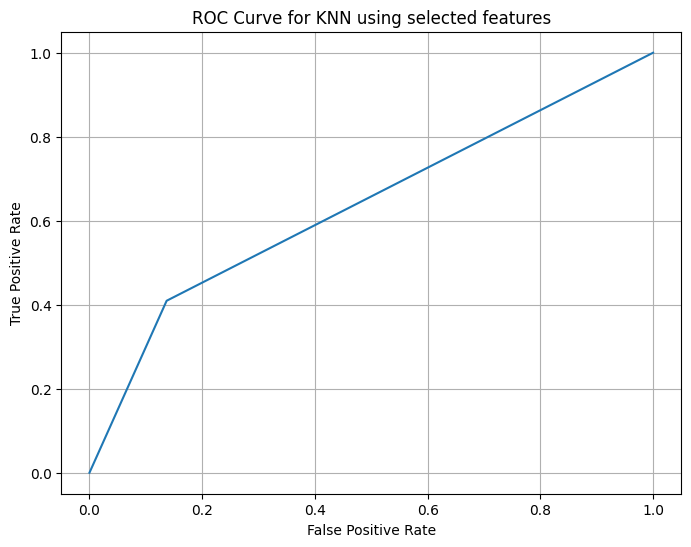

In [ ]:
y_pred_knn = best_knn_model.predict(selected_features_df_test)
y_pred_proba_knn = best_knn_model.predict_proba(selected_features_df_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba_knn)

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr)
plt.title('ROC Curve for KNN using selected features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [ ]:
roc_auc_logreg = roc_auc_score(y_test,y_pred_proba_knn)
print("AUC-ROC:", roc_auc_logreg)


AUC-ROC: 0.6362469256995683


## Ensambles

## Boosting

In [ ]:

# AdaBoost
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=random_state)  # Adjust n_estimators as needed
ada_boost.fit(selected_features_df, y_combined)
y_pred_ada = ada_boost.predict(selected_features_df_test)
print(classification_report(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))
roc_auc_ada = roc_auc_score(y_test, ada_boost.predict_proba(selected_features_df_test)[:, 1])
print("AUC-ROC AdaBoost:", roc_auc_ada)

In [ ]:

# Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=random_state)
gb_classifier.fit(selected_features_df, y_combined)
y_pred_gb = gb_classifier.predict(selected_features_df_test)
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
roc_auc_gb = roc_auc_score(y_test, gb_classifier.predict_proba(selected_features_df_test)[:, 1])
print("AUC-ROC Gradient Boosting:", roc_auc_gb)

              precision    recall  f1-score   support

           0       0.92      0.72      0.80      1373
           1       0.32      0.68      0.44       276

    accuracy                           0.71      1649
   macro avg       0.62      0.70      0.62      1649
weighted avg       0.82      0.71      0.74      1649

[[982 391]
 [ 88 188]]
AUC-ROC Gradient Boosting: 0.7978720035466607


In [ ]:
# XGBoost (already imported as xgb)
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=random_state)
xgb_classifier.fit(selected_features_df, y_combined)
y_pred_xgb = xgb_classifier.predict(selected_features_df_test)
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
roc_auc_xgb = roc_auc_score(y_test, xgb_classifier.predict_proba(selected_features_df_test)[:, 1])
print("AUC-ROC XGBoost:", roc_auc_xgb)

In [ ]:
# LightGBM (already imported as lgb)
lgb_classifier = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=random_state)
lgb_classifier.fit(selected_features_df, y_combined)
y_pred_lgb = lgb_classifier.predict(selected_features_df_test)
print(classification_report(y_test, y_pred_lgb))
print(confusion_matrix(y_test, y_pred_lgb))
roc_auc_lgb = roc_auc_score(y_test, lgb_classifier.predict_proba(selected_features_df_test)[:, 1])
print("AUC-ROC LightGBM:", roc_auc_lgb)


              precision    recall  f1-score   support

           0       0.92      0.72      0.80      1373
           1       0.32      0.68      0.44       276

    accuracy                           0.71      1649
   macro avg       0.62      0.70      0.62      1649
weighted avg       0.82      0.71      0.74      1649

[[982 391]
 [ 88 188]]
AUC-ROC Gradient Boosting: 0.7978931146225867


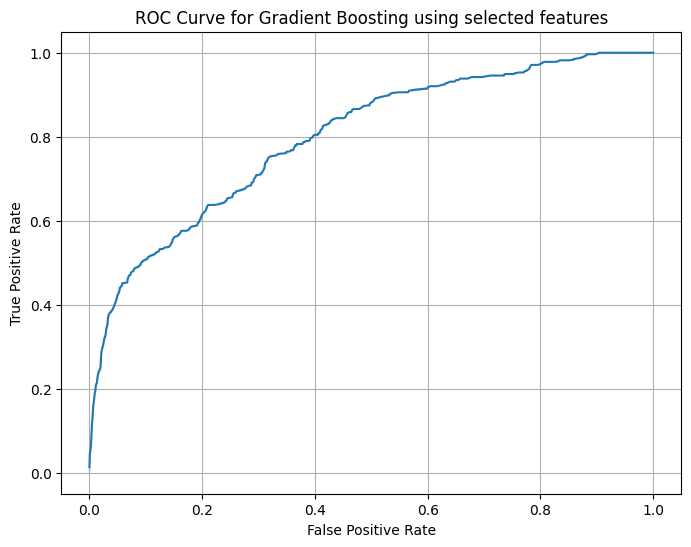

In [ ]:

# Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=random_state)
gb_classifier.fit(selected_features_df, y_combined)
y_pred_gb = gb_classifier.predict(selected_features_df_test)
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
roc_auc_gb = roc_auc_score(y_test, gb_classifier.predict_proba(selected_features_df_test)[:, 1])
print("AUC-ROC Gradient Boosting:", roc_auc_gb)
fpr, tpr, thresholds = roc_curve(y_test, gb_classifier.predict_proba(selected_features_df_test)[:, 1])

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr)
plt.title('ROC Curve for Gradient Boosting using selected features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

## Bagging

In [ ]:
base_estimator = LogisticRegression(random_state=random_state)

bagging_model = BaggingClassifier(
    estimator=base_estimator,  # Specify the base model using 'estimator'
    n_estimators=10,  # Number of base estimators (trees)
    random_state=random_state,
    n_jobs=-1
)


# Train the Bagging model
bagging_model.fit(selected_features_df, y_combined)

# Make predictions
y_pred_bagging = bagging_model.predict(selected_features_df_test)


              precision    recall  f1-score   support

           0       0.92      0.60      0.73      1373
           1       0.27      0.74      0.40       276

    accuracy                           0.62      1649
   macro avg       0.59      0.67      0.56      1649
weighted avg       0.81      0.62      0.67      1649

[[827 546]
 [ 73 203]]
AUC-ROC Bagging: 0.7376368261608454


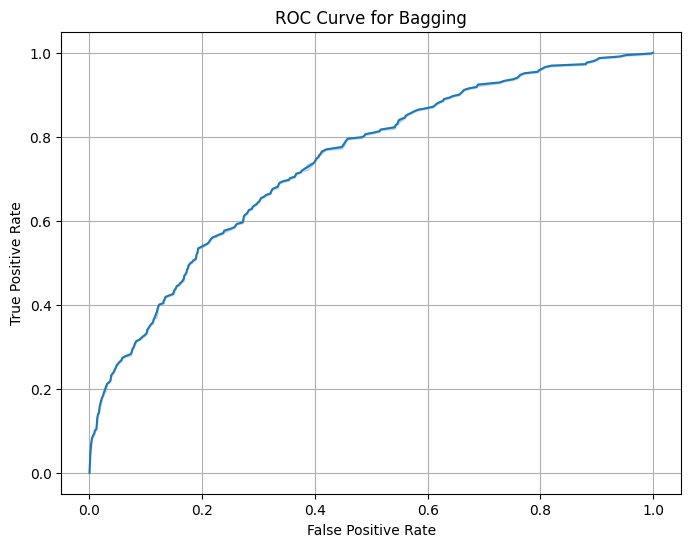

In [ ]:
# Evaluate the Bagging model
print(classification_report(y_test, y_pred_bagging))
print(confusion_matrix(y_test, y_pred_bagging))
roc_auc_bagging = roc_auc_score(y_test, bagging_model.predict_proba(selected_features_df_test)[:, 1])
print("AUC-ROC Bagging:", roc_auc_bagging)

fpr, tpr, thresholds = roc_curve(y_test, bagging_model.predict_proba(selected_features_df_test)[:, 1])

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr)
plt.title('ROC Curve for Bagging')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

#RED NEURONAL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - auc_roc: 0.5685 - loss: 0.8347 - val_auc_roc: 0.0000e+00 - val_loss: 0.6824 - learning_rate: 1.0000e-04
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - auc_roc: 0.6439 - loss: 0.7452 - val_auc_roc: 0.0000e+00 - val_loss: 0.6797 - learning_rate: 1.0000e-04
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc_roc: 0.6780 - loss: 0.6807 - val_auc_roc: 0.0000e+00 - val_loss: 0.6888 - learning_rate: 1.0000e-04
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc_roc: 0.6763 - loss: 0.6735 - val_auc_roc: 0.0000e+00 - val_loss: 0.6849 - learning_rate: 1.0000e-04
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc_roc: 0.6793 - loss: 0.6645 - val_auc_roc: 0.0000e+00 - val_loss: 0.6973 - learning_rate: 1.0000e-04
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc_roc: 0.6994 - loss: 0.6359 - val_auc_roc: 0.0000e+00 - val_loss: 0.7021 - learning_rate: 1.0000e-04
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

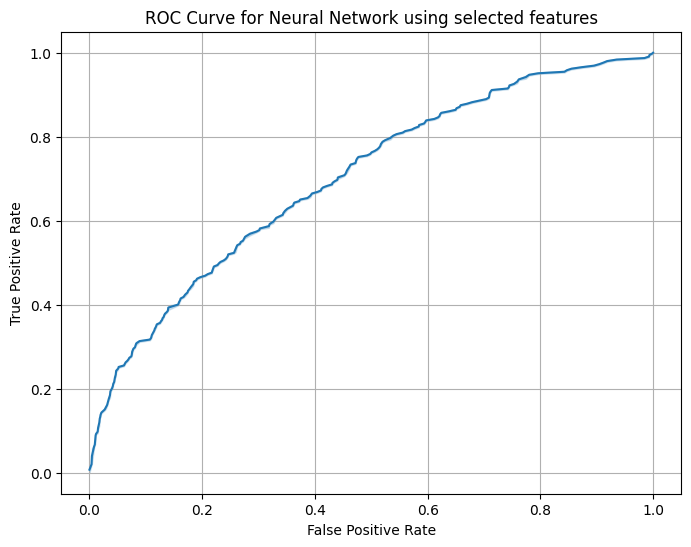

In [ ]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(selected_features_df.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

# Compilación con métrica AUC-ROC.
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc_roc')]
)

# Callbacks para evitar overfitting y ajustar learning rate
early_stop = EarlyStopping(monitor='val_auc_roc', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_auc_roc', factor=0.2, patience=5, min_lr=1e-6)

history = model.fit(
    selected_features_df, y_combined,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluacion
y_pred_proba_nn = model.predict(selected_features_df_test)
y_pred_nn = (y_pred_proba_nn > 0.5).astype("int32") # Convert probabilities to binary predictions

print(classification_report(y_test, y_pred_nn))
print(confusion_matrix(y_test, y_pred_nn))
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)
print("AUC-ROC Neural Network:", roc_auc_nn)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_nn)

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr)
plt.title('ROC Curve for Neural Network using selected features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

# Redes neuronales para tareas de clasificación usando KerasClaasifier

In [ ]:
!pip install scikit-learn==1.3.2 #Para evitar problemas de dependencias entre librerias de keras y sklearn

In [ ]:
# Definir modelo
def create_model(lr=0.001, input_shape=None):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(input_shape,)))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=[AUC(name='auc')])
    return model

# Callbacks
early_stopping_cb = EarlyStopping(monitor='val_auc', patience=10, mode='max', restore_best_weights=True)

# Envoltorio KerasClassifier
keras_model = KerasClassifier(
    model=create_model,
    epochs=50,
    verbose=0,
    model__input_shape=selected_features_df.shape[1],
    callbacks=[early_stopping_cb]
)

# Búsqueda de hiperparámetros
param_dist = {
    'model__lr': [0.0001, 0.0005, 0.001],
    'batch_size': [32, 64, 128]
}

search = RandomizedSearchCV(
    estimator=keras_model,
    param_distributions=param_dist,
    n_iter=5,
    cv=2,
    scoring='roc_auc',
    n_jobs=-1
)

# Entrenamiento
# Use the correctly defined variables for the training data and the target variable
search.fit(selected_features_df, y_combined)

AUC-ROC KerasClassifier: 0.8095886506855822


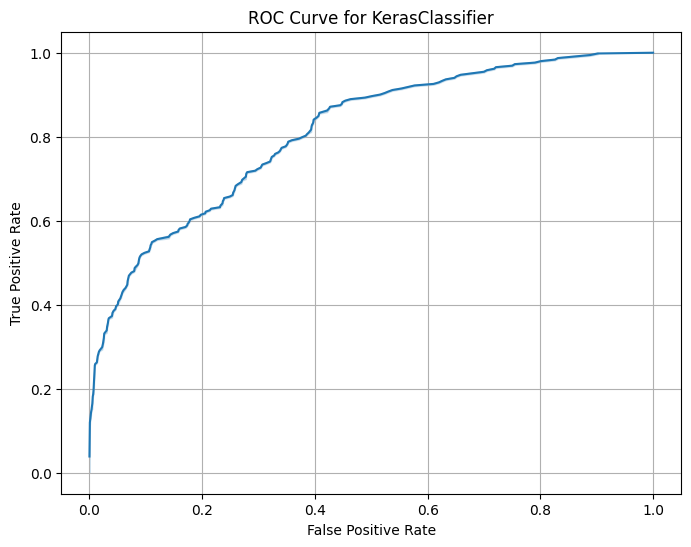

In [ ]:

best_nn_model = search.best_estimator_

# Realizar predicciones de probabilidad en el conjunto de prueba
y_pred_proba_keras = best_nn_model.predict_proba(selected_features_df_test)[:, 1]

# Calcular el AUC
roc_auc_keras = roc_auc_score(y_test, y_pred_proba_keras)
print("AUC-ROC KerasClassifier:", roc_auc_keras)

# Opcional: Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_keras)

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr)
plt.title('ROC Curve for KerasClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators=[('nn', keras_model), ('gb', gb_classifier)],
    voting='soft'
)

# Train the VotingClassifier on the combined training data
voting.fit(selected_features_df, y_combined)
#Prediccion AUC
y_pred_proba = voting.predict_proba(selected_features_df_test)[:, 1]
roc_auc_ensemble = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC Ensemble:", roc_auc_ensemble)

/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AUC-ROC Ensemble: 0.8080211532980779


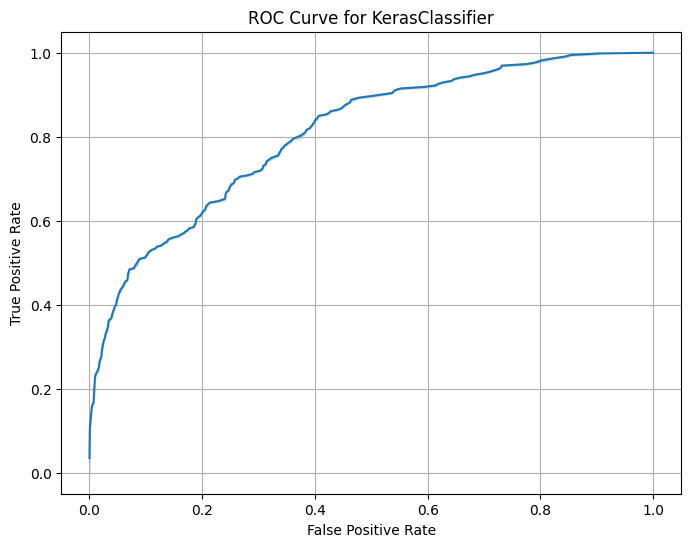

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr)
plt.title('ROC Curve for KerasClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

#Calculo de punto de corte para maximizar ganancias segun el modelo seleccionado

In [ ]:
avg_cltv =267765.690404/6 #Facturacion promedio de clientes en cada mes

In [ ]:
cost_per_customer = 15000  #Valor de asumir que intervenir un cliente en particular en colombia para la telefonica es 30000 pesos

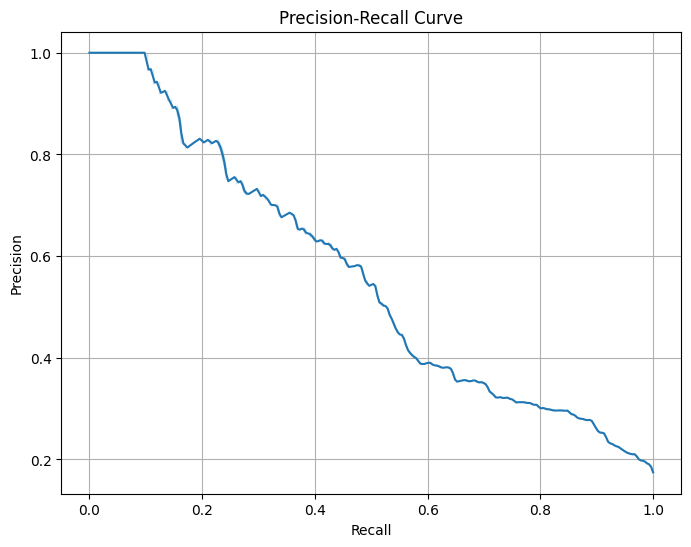

Threshold | Precision | Recall
0.0058    | 0.1674    | 1.0000
0.0172    | 0.1684    | 1.0000
0.0230    | 0.1694    | 1.0000
0.0315    | 0.1705    | 1.0000
0.0394    | 0.1715    | 1.0000
0.0440    | 0.1726    | 1.0000
0.0470    | 0.1737    | 1.0000
0.0510    | 0.1748    | 1.0000
0.0536    | 0.1759    | 1.0000
0.0598    | 0.1770    | 1.0000
0.0625    | 0.1782    | 1.0000
0.0658    | 0.1793    | 1.0000
0.0711    | 0.1805    | 1.0000
0.0748    | 0.1817    | 1.0000
0.0788    | 0.1822    | 0.9964
0.0836    | 0.1835    | 0.9964
0.0855    | 0.1847    | 0.9964
0.0929    | 0.1859    | 0.9964
0.0973    | 0.1872    | 0.9964
0.1001    | 0.1885    | 0.9964
0.1042    | 0.1898    | 0.9964
0.1071    | 0.1904    | 0.9928
0.1102    | 0.1910    | 0.9891
0.1187    | 0.1924    | 0.9891
0.1244    | 0.1938    | 0.9891
0.1302    | 0.1944    | 0.9855
0.1354    | 0.1958    | 0.9855
0.1395    | 0.1972    | 0.9855
0.1424    | 0.1972    | 0.9783
0.1459    | 0.1987    | 0.9783
0.1511    | 0.1994    | 0.9746
0.1552  

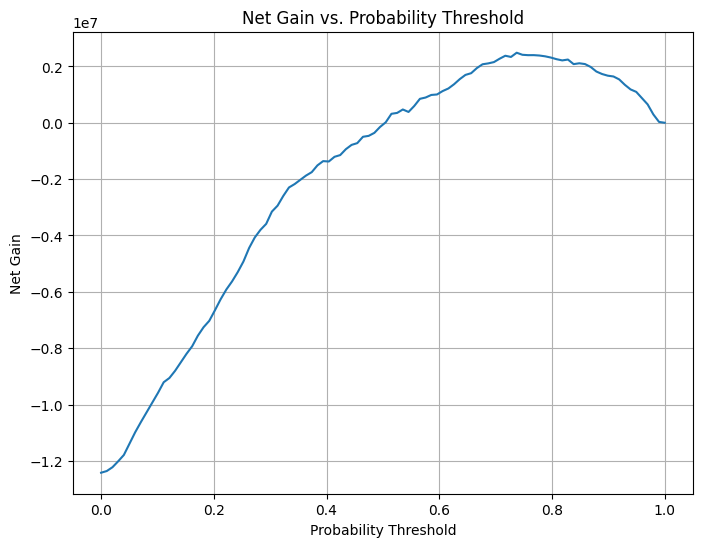

Best threshold for maximum gain: 0.7374
Maximum estimated gain: $2485100.42

Classification Report at Best Threshold (0.7374):
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1373
           1       0.58      0.49      0.53       276

    accuracy                           0.85      1649
   macro avg       0.74      0.71      0.72      1649
weighted avg       0.85      0.85      0.85      1649

Confusion Matrix at Best Threshold (0.7374):
[[1274   99]
 [ 142  134]]


In [ ]:
y_pred_proba = voting.predict_proba(selected_features_df_test)[:, 1]

fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)

# Calculate Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)

# Visualizacion de posibles cut-off
plt.figure(figsize=(8, 6))
sns.lineplot(x=recall, y=precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()
#Puntos de corte segun precision y exhaustividad
print("Threshold | Precision | Recall")
for i in range(0, len(pr_thresholds), 10): # Print every 10th threshold for brevity
  threshold = pr_thresholds[i]
  p = precision[i]
  r = recall[i]
  print(f"{threshold:.4f}    | {p:.4f}    | {r:.4f}")

potential_thresholds = np.linspace(0, 1, 100)
gains = []

for threshold in potential_thresholds:

  predicted_churn = (y_pred_proba >= threshold)

  # Identify true positives (customers who churned and we predicted they would)
  true_positives = (predicted_churn == 1) & (y_test == 1)

  # Identify false positives (customers who didn't churn but we predicted they would)
  false_positives = (predicted_churn == 1) & (y_test == 0)

  # Number of customers to intervene on
  num_interventions = np.sum(predicted_churn)

  # Calculate the cost of interventions
  total_intervention_cost = num_interventions * cost_per_customer

  saved_revenue = np.sum(true_positives) * avg_cltv

  # Calculo de ganancias por puntos de corte
  net_gain = saved_revenue - total_intervention_cost
  gains.append(net_gain)

# Plot the gains for each threshold
plt.figure(figsize=(8, 6))
sns.lineplot(x=potential_thresholds, y=gains)
plt.title('Net Gain vs. Probability Threshold')
plt.xlabel('Probability Threshold')
plt.ylabel('Net Gain')
plt.grid(True)
plt.show()

# Find the threshold that maximizes gain
best_threshold_index = np.argmax(gains)
best_threshold = potential_thresholds[best_threshold_index]
max_gain = gains[best_threshold_index]

print(f"Best threshold for maximum gain: {best_threshold:.4f}")
print(f"Maximum estimated gain: ${max_gain:.2f}")

# You can further analyze the performance metrics (Precision, Recall, F1) at the best threshold
y_pred_at_best_threshold = (y_pred_proba >= best_threshold).astype(int)
print(f"\nClassification Report at Best Threshold ({best_threshold:.4f}):")
print(classification_report(y_test, y_pred_at_best_threshold))
print(f"Confusion Matrix at Best Threshold ({best_threshold:.4f}):")
print(confusion_matrix(y_test, y_pred_at_best_threshold))

#Analisis explicativo

In [ ]:
!pip install shap

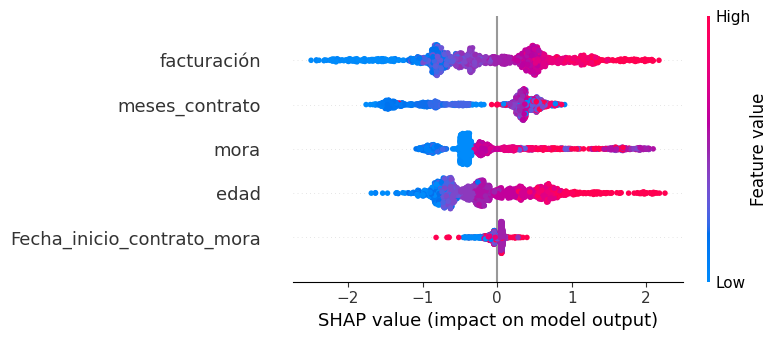

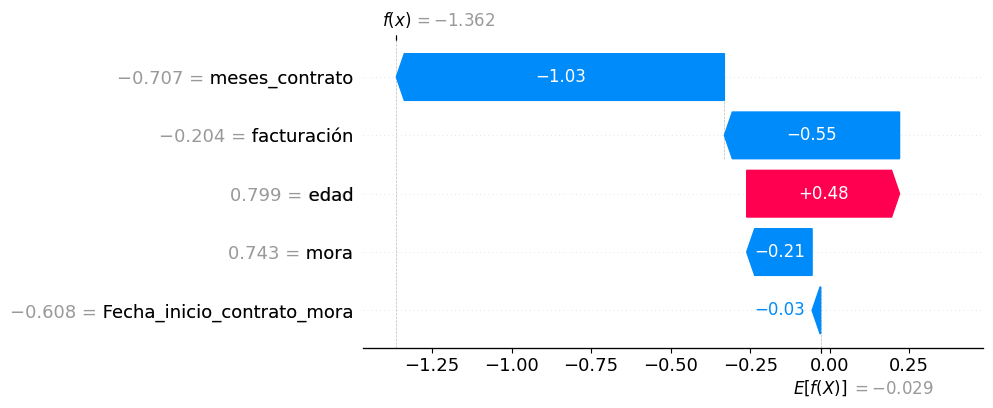


Waterfall plot for instance 0:


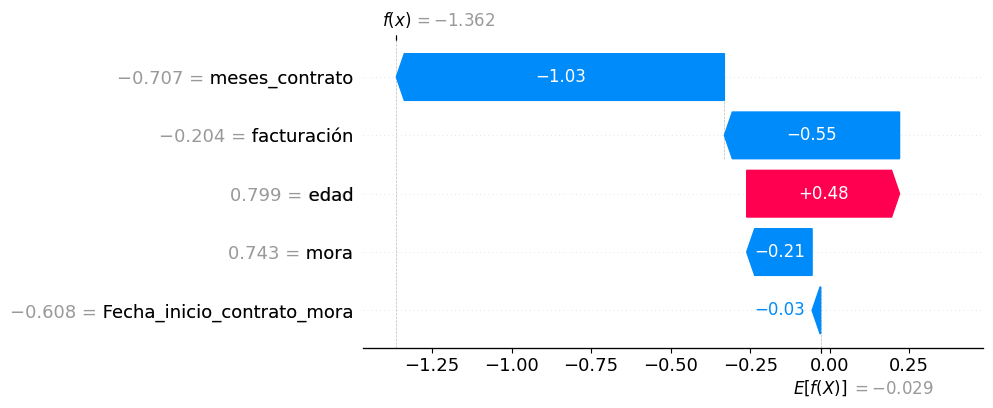


Waterfall plot for instance 1:


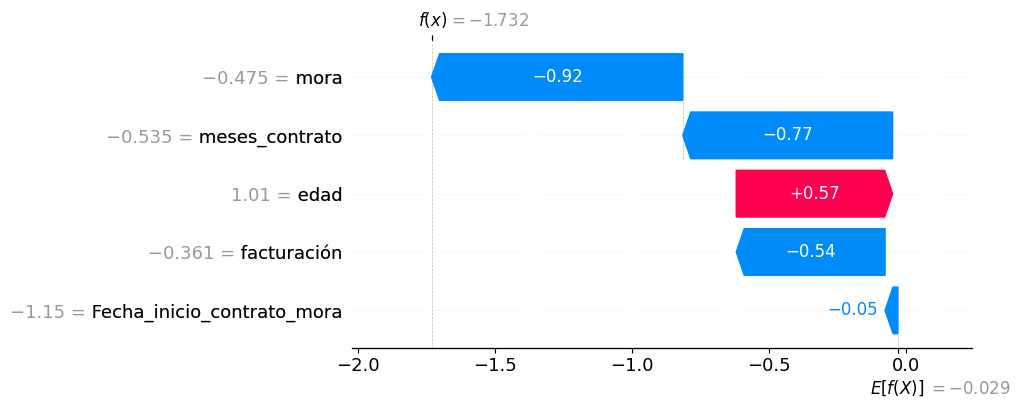


Waterfall plot for instance 2:


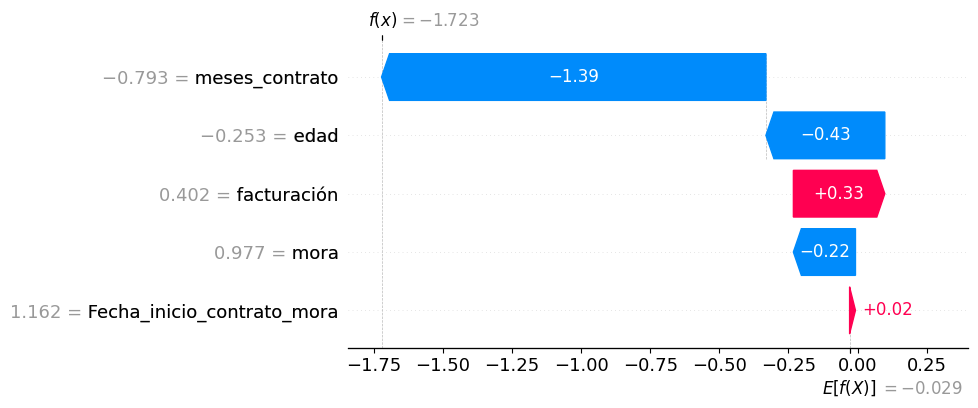


Waterfall plot for instance 3:


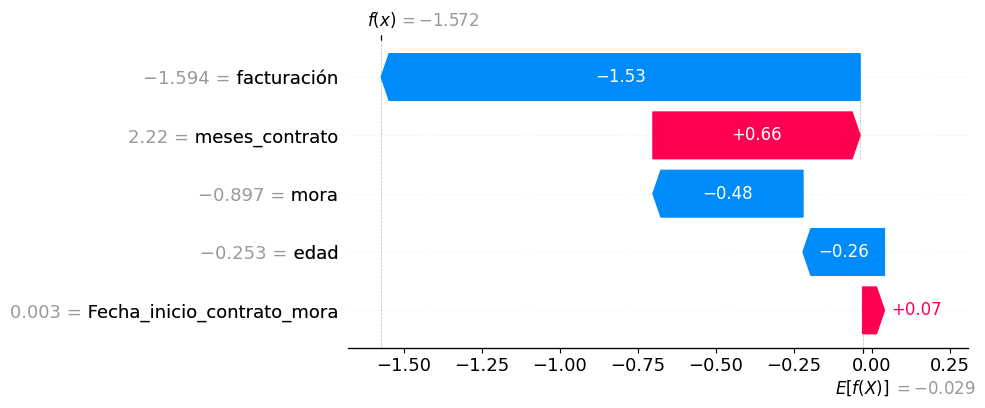


Waterfall plot for instance 4:


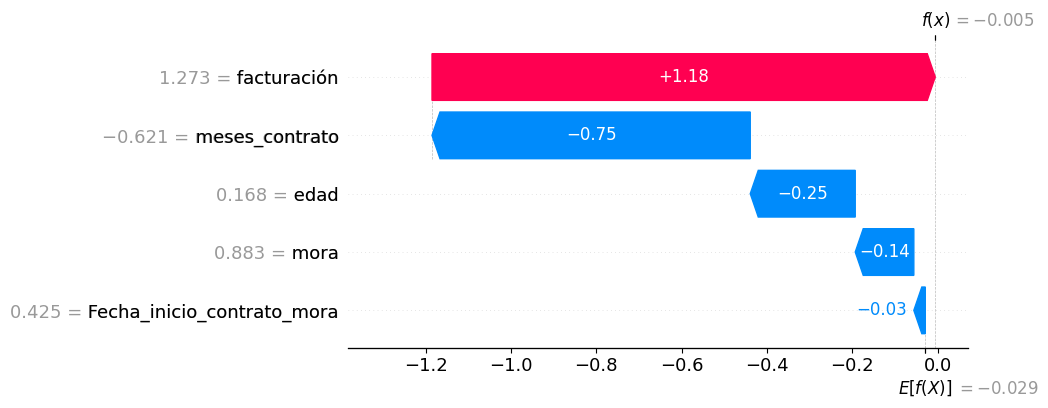

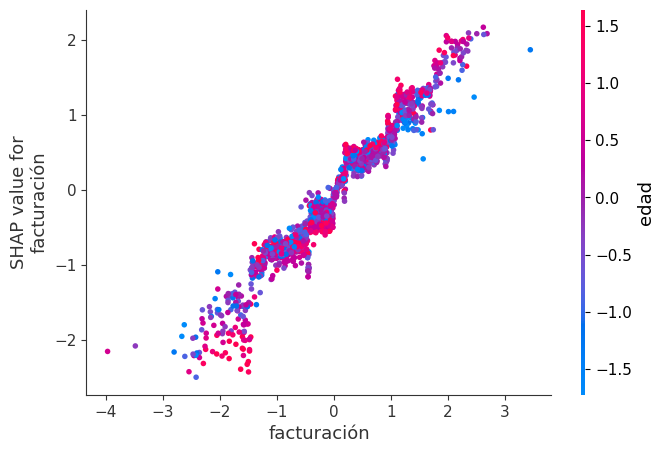

In [ ]:
import shap

model_to_explain = gb_classifier

explainer = shap.Explainer(model_to_explain, selected_features_df)

shap_values = explainer(selected_features_df_test)

# Summarize the feature importance
shap.summary_plot(shap_values, selected_features_df_test)
instance_index = 0
shap.plots.waterfall(shap_values[instance_index])
for i in range(5):
    print(f"\nWaterfall plot for instance {i}:")
    shap.plots.waterfall(shap_values[i])
shap.dependence_plot("facturación", shap_values.values, selected_features_df_test)

#Calculo de predicciones

In [ ]:
testelco=pd.read_excel('/content/testelco.xlsx')

In [ ]:
testelco.head()

,id,Fecha de nacimiento,tipo cliente,Factura online,Antigüedad Equipo,Plan de datos,facturación,mora,Fecha inicio contrato,minutos
0,13,1996-10-28 20:37:48.858,2,0,18,1,319690,0,2016-08-01 18:35:57.816,1202
1,14,1985-11-08 12:29:16.237,2,1,6,1,333812,0,2016-04-01 19:20:55.326,1403
2,20,1987-08-15 05:31:09.530,2,0,35,1,224201,43,2017-10-12 05:47:50.487,659
3,30,1981-11-06 04:06:28.190,1,1,11,1,210614,33,2018-02-09 20:47:49.340,912
4,37,1986-08-03 13:43:36.300,1,0,34,1,267116,15,2017-02-01 17:42:17.169,1622


In [ ]:
testelco['edad'] = (datetime.now().year - pd.to_datetime(testelco['Fecha de nacimiento']).dt.year)


In [ ]:
testelco_encoded = pd.get_dummies(testelco,  columns=['tipo cliente','Factura online','Plan de datos'])


In [ ]:
testelco_encoded['meses_contrato'] = (datetime.now().year - pd.to_datetime(testelco_encoded['Fecha inicio contrato']).dt.year) * 12 + (datetime.now().month - pd.to_datetime(testelco_encoded['Fecha inicio contrato']).dt.month)

In [ ]:
testelco_encoded['Antigüedad_Equipo_Factura_online_0'] = testelco_encoded['Antigüedad Equipo'] * testelco_encoded['Factura online_0']
testelco_encoded['Antigüedad_Equipo_Factura_online_1'] = testelco_encoded['Antigüedad Equipo'] * testelco_encoded['Factura online_1']
testelco_encoded['Fecha_inicio_contrato_mora'] = pd.to_numeric(pd.to_datetime(testelco_encoded['Fecha inicio contrato'])) * testelco_encoded['mora']


In [ ]:
X_scaled_testelco = scaler.fit_transform(testelco_encoded.select_dtypes(include=['number']))

In [ ]:
# Create a DataFrame from the scaled features:
selected_features_testelco = pd.DataFrame(X_scaled_testelco, columns=testelco_encoded.select_dtypes(include=['number']).columns, index=testelco_encoded.index).loc[:, ['facturación', 'edad', 'Fecha_inicio_contrato_mora', 'meses_contrato', 'mora']]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_testelco = gb_classifier.predict(selected_features_testelco)
print("Predictions for testelco data (0 for no churn, 1 for churn):")
y_pred_testelco

In [ ]:
predictions_df.head(10)

,id,probabilidad_churn
0,13,0.366018
1,14,0.389758
2,20,0.044964
3,30,0.262030
4,37,0.430699
5,47,0.386331
6,53,0.386847
7,63,0.728562
8,75,0.096203
9,77,0.258948


In [ ]:
y_pred_gb_test= gb_classifier.predict(selected_features_testelco)
y_pred_gb_df = pd.DataFrame({'prediction': y_pred_gb_test})



In [ ]:
y_pred_gb_df.head(10)

In [ ]:
df_final=pd.concat([testelco['id'],y_pred_gb_df],axis=1)

In [ ]:
df_final.head(100)

In [ ]:
df_final['prediction'].value_counts()

,count
prediction,
0,1129
1,871


In [ ]:
df_final.to_csv('df_prediccion.csv', index=False)

In [ ]:
y_pred_voting_test= voting.predict(selected_features_testelco)

In [ ]:
y_pred_voting_df = pd.DataFrame({'prediction': y_pred_voting_test})
df_final_voting=pd.concat([testelco['id'],y_pred_voting_df],axis=1)

In [ ]:
df_final_voting.head(100)

In [ ]:
df_final_voting.to_csv('df_prediccion_voting.csv', index=False)

In [ ]:

from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_pred_gb_df['prediction'], y_pred_voting_df['prediction'])
print(f"Coeficiente Kappa de Cohen entre y_pred_gb_df y y_pred_voting_df: {kappa:.4f}")

Coeficiente Kappa de Cohen entre y_pred_gb_df y y_pred_voting_df: 0.8768
